In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#read the dataset 
df=pd.read_csv('data/listings.csv')
df2=pd.read_csv('data/reviews.csv')
print(df.shape)
print(df2.shape)

(3585, 95)
(68275, 6)


In [3]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### Data Cleaning

In [4]:
#Columns that more than 50% Empty
empty_columns=set(df.columns[df.isnull().mean()>0.5])
print(empty_columns)

{'monthly_price', 'security_deposit', 'square_feet', 'neighbourhood_group_cleansed', 'jurisdiction_names', 'notes', 'has_availability', 'license', 'weekly_price'}


In [5]:
#drop columns that have more than 50% empty data.
df.drop(columns=empty_columns,inplace=True)

In [6]:
cat_cols=['host_response_time','host_is_superhost','host_has_profile_pic',
          'host_identity_verified','neighbourhood_cleansed','bed_type','property_type','room_type','requires_license',
         'requires_license', 'instant_bookable',
          'cancellation_policy', 'require_guest_profile_picture',
          'require_guest_phone_verification']
num_cols=['host_total_listings_count','accommodates','bathrooms',
          'bedrooms', 'beds', 'guests_included',
          'minimum_nights', 'maximum_nights', 'number_of_reviews',
          'review_scores_rating', 'review_scores_accuracy',
          'review_scores_cleanliness', 'review_scores_checkin',
          'review_scores_communication', 'review_scores_location',
          'review_scores_value', 'calculated_host_listings_count',
          'reviews_per_month']
rate_cols=['host_response_rate','host_acceptance_rate']
other_cols=['price','cleaning_fee','extra_people']

In [7]:
for column in rate_cols:
    df[column]= df[column].str.replace('%','')
    df[column] = pd.to_numeric(df[column], downcast="float")
    df[column].fillna(df[column].mean(), inplace =True)

In [8]:
for column in num_cols:
    print(column)
    df[column] = pd.to_numeric(df[column], downcast="float")
    df[column].fillna(df[column].mean(), inplace =True)

host_total_listings_count
accommodates
bathrooms
bedrooms
beds
guests_included
minimum_nights
maximum_nights
number_of_reviews
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
calculated_host_listings_count
reviews_per_month


In [9]:
for column in other_cols:
    df[column]= df[column].str.replace('%','')
    df[column]= df[column].str.replace('$','')
    df[column]= df[column].str.replace(',','')
    df[column] = pd.to_numeric(df[column], downcast="float")
    

In [10]:
df['cleaning_fee'].fillna(df['cleaning_fee'].mean(), inplace =True)

### Explatory Data Analysis

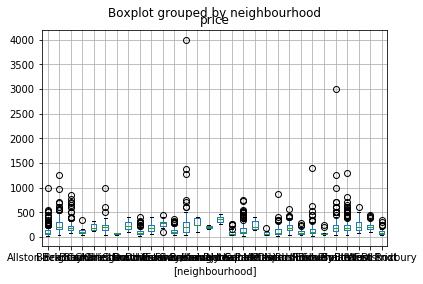

In [11]:
df[['price','neighbourhood']].boxplot(by='neighbourhood')

all seems to be between mainly between 0-300 and not really can affect the price. 

In [12]:
df.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

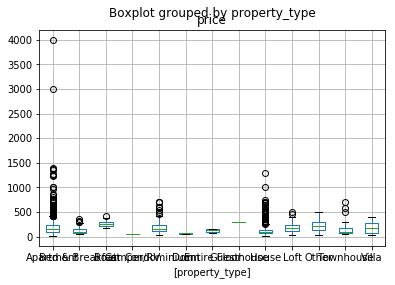

In [13]:
df[['price','property_type']].boxplot(by='property_type')

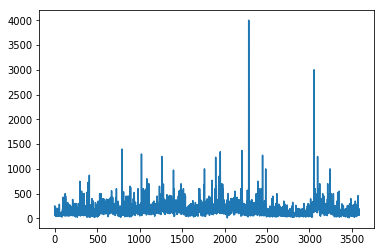

In [14]:
df['price'].plot()

In [15]:
#remove heavy outliers
df=df[df['price']<1500]

In [17]:
#column types
df.select_dtypes(include='object')
#unnecessary columns--mainly either text or single value columns
uc=['host_url','latitude', 'first_review', 'last_review', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
    'longitude', 'is_location_exact','smart_location','last_scraped'
    ,'scrape_id','description','interaction','house_rules','xl_picture_url'
    ,'host_name','host_about','thumbnail_url','medium_url','picture_url'
    ,'summary','space','experiences_offered','neighborhood_overview'
    ,'transit','access','calendar_updated','calendar_last_scraped',
    'host_thumbnail_url', 'host_picture_url','host_neighbourhood',
    'host_listings_count','street','city','state', 'zipcode','market','listing_url','country','country_code','neighbourhood']
df.drop(columns=uc,inplace=True)

In [18]:
#save clean data
df.to_csv('data/listings_cleaned.csv',index=False)

In [19]:
df.shape

(3583, 43)